   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


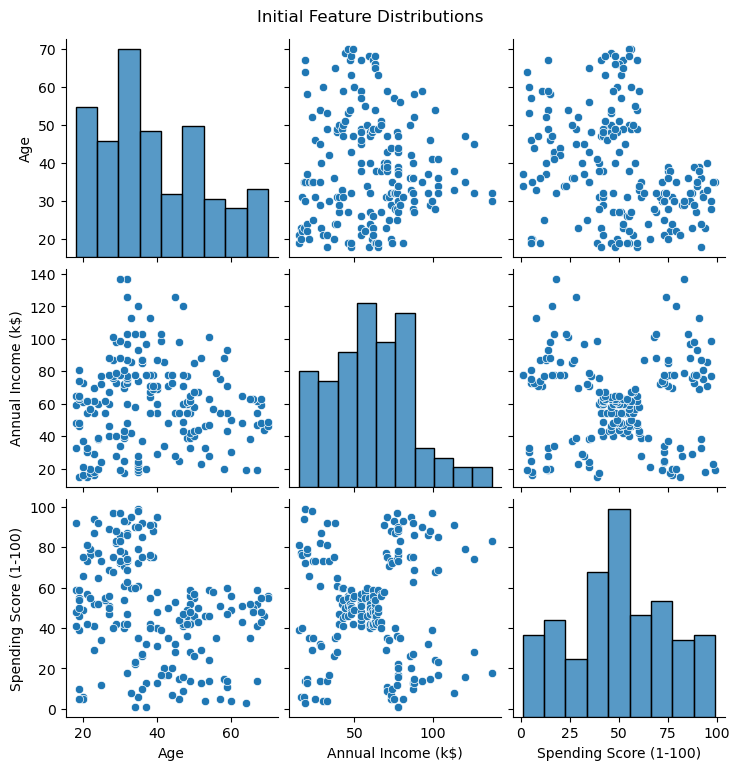

C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

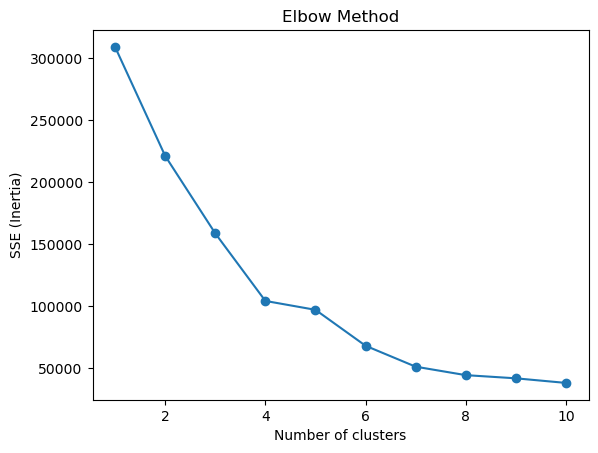

C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


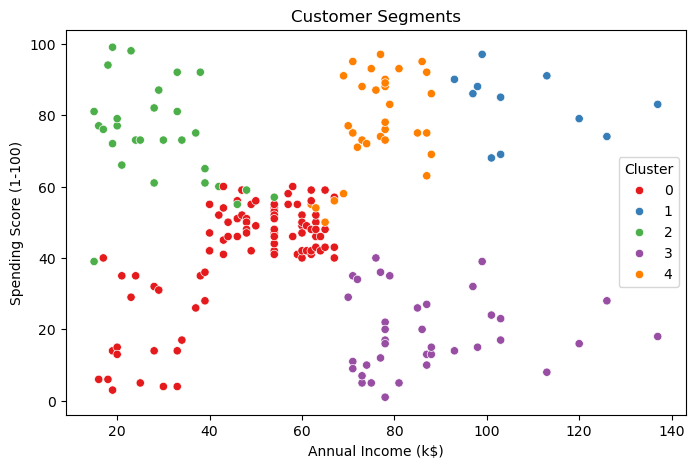

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')
print(df.head())

df_clean = df.drop(['CustomerID', 'Gender'], axis=1)

sns.pairplot(df_clean)
plt.suptitle("Initial Feature Distributions", y=1.02)
plt.show()

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_clean)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_clean)

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='Set1',
    data=df_clean
)
plt.title('Customer Segments')
plt.show()